# Palmer Penguins — Arbre de décision & LDA (exercices)

Objectifs :
- Charger et explorer un jeu de données.
- Nettoyer les valeurs manquantes.
- Entraîner un **arbre de décision** puis un modèle **LDA**.
- Évaluer un classifieur (accuracy, matrice de confusion, rapport).
- Visualiser une frontière de décision en 2D.

> Dans les cellules d'exercices, remplacez les `...` et complétez les lignes marquées `TODO`.


## 0. Installation / Import des bibliothèques

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt


## 1. Chargement et exploration des données

Dans Colab, vous pouvez :
- soit **uploader** `palmerpenguins.csv` depuis votre ordinateur ;
- soit adapter la cellule pour lire depuis une URL (si votre enseignant en fournit une).

Le fichier contient des séparateurs et décimales au format européen.


In [ ]:
from google.colab import files
uploaded = files.upload()

# Après upload, vous devriez voir le nom du fichier (ex: 'palmerpenguins.csv')
print(list(uploaded.keys()))


### Exercice 1 — Lire le CSV

In [2]:
# TODO :
# - Compléter sep et decimal pour lire correctement le fichier.
# Indice : le séparateur est souvent ';' et la virgule peut être utilisée pour les décimales.

df = pd.read_csv("palmerpenguins.csv", sep=";", decimal=",")

df.head()


,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


### Exercice 2 — Observer la structure et les colonnes

In [13]:
# TODO :
# - Afficher les dimensions du DataFrame
# - Afficher la liste des colonnes
# - Afficher les types de colonnes

print("Shape:", df.shape)
print("Colonnes:", [col for col in df.columns])

# Était-ce cela que l'on attendait pour le type des colonnes ? Non a priori.
print("Types des colonnes", [type(col) for col in df.columns])

Shape: (344, 9)
Colonnes: ['Unnamed: 0', 'species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'year']
Types des colonnes [<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>]


### Exercice 3 — Visualisations simples (scatter)

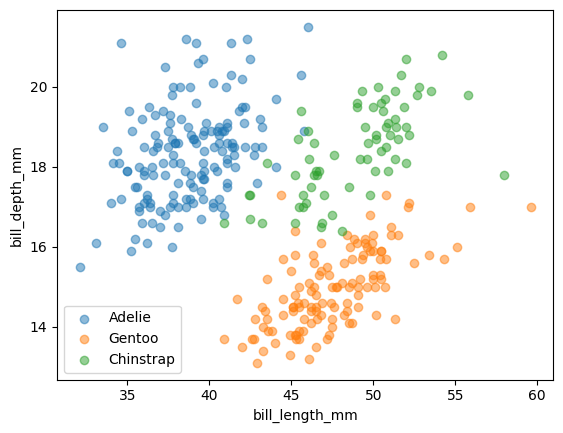

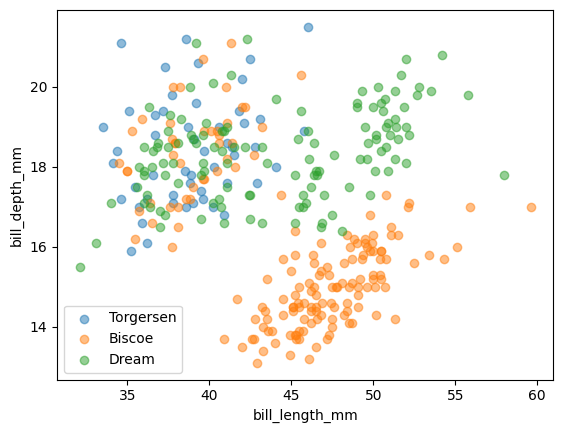

In [32]:
def plot_xy(df, x, y, c):
    """Affiche un nuage de points (x, y) coloré par la colonne c."""
    # TODO :
    # - Boucler sur les valeurs uniques de df[c]
    # - Pour chaque groupe, filtrer les lignes correspondantes
    # - plt.scatter(...) puis labels + légende
    for group in df[c].unique():
        subset = df[df[c] == group]
        plt.scatter(subset[x], subset[y], label=group, alpha=0.5)

    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.show()

# À tester
plot_xy(df, 'bill_length_mm', 'bill_depth_mm', 'species')
plot_xy(df, 'bill_length_mm', 'bill_depth_mm', 'island')

### Exercice 4 — Statistiques descriptives et valeurs manquantes

In [33]:
# TODO :
# - Afficher des statistiques descriptives (incluant les colonnes non numériques)
# - Compter les valeurs manquantes par colonne

display(df.describe(include="all"))
display(df.isna().sum())


,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,344.000000,344,344,342.000000,342.000000,342.000000,342.000000,333,344.000000
unique,NaN,3,3,NaN,NaN,NaN,NaN,2,NaN
top,NaN,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,NaN,152,168,NaN,NaN,NaN,NaN,168,NaN
mean,172.500000,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN,2008.029070
std,99.448479,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN,0.818356
min,1.000000,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,86.750000,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,172.500000,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,258.250000,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,2009.000000


Unnamed: 0            0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

## 2. Nettoyage des données

### Exercice 5 — Supprimer les lignes avec valeurs manquantes

In [35]:
# TODO :
# - Créer une copie du DataFrame
# - Supprimer les lignes contenant au moins une valeur manquante

df_clean = df
df_clean = df_clean.dropna() # Remove missing values.

df_clean.isna().sum()


Unnamed: 0           0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

### Exercice 6 — Définir X (features) et y (target)

In [36]:
# On veut prédire 'species'
target_parameter = 'species'
y = df_clean[target_parameter]

# TODO :
# Créer une liste explicite des 4 variables explicatives :
# - 'bill_length_mm'
# - 'bill_depth_mm'
# - 'flipper_length_mm'
# - 'body_mass_g'
feature_names = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

X = df_clean[feature_names]

print("Features:", feature_names)
print("Classes:", y.unique())


Features: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
Classes: ['Adelie' 'Gentoo' 'Chinstrap']


## 3. Arbre de décision

### Exercice 7 — Split train/test, entraînement, accuracy

In [37]:
# TODO :
# - Faire un split train/test (test_size=0.3, random_state=42)
# - Entraîner un DecisionTreeClassifier (max_depth=3, random_state=42)
# - Afficher l'accuracy sur le jeu de test

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

clf_tree = DecisionTreeClassifier(random_state=42, max_depth=3)
clf_tree.fit(X_train, y_train)

accuracy = clf_tree.score(X_test, y_test)
print(f"Accuracy (arbre): {accuracy:.2f}")


Accuracy (arbre): 0.95


### Exercice 8 — Visualiser l'arbre

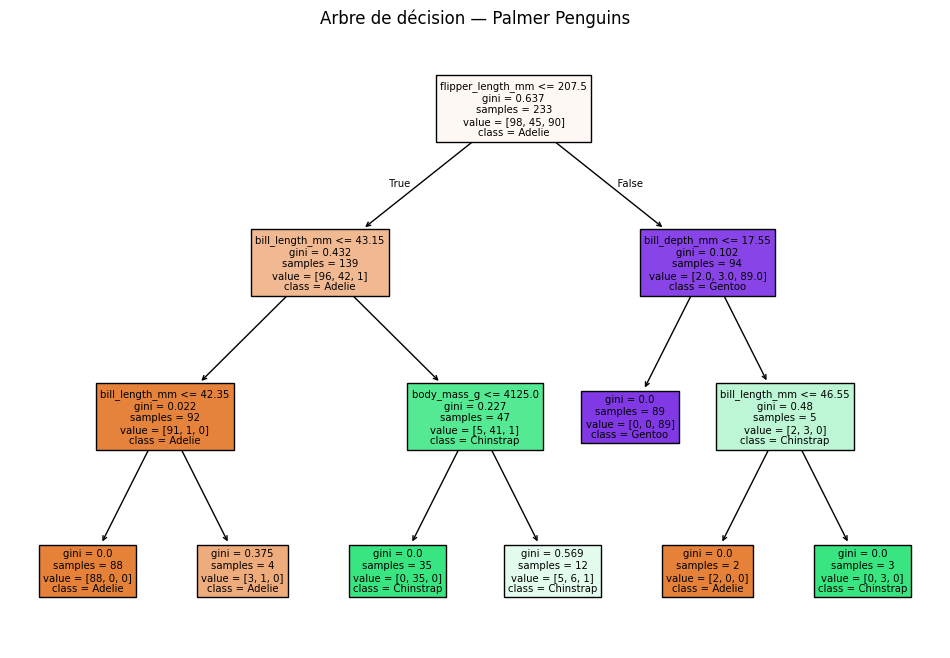

In [38]:
plt.figure(figsize=(12, 8))
tree.plot_tree(
    clf_tree,
    filled=True,
    feature_names=feature_names,
    class_names=sorted(y.unique().astype(str))
)
plt.title("Arbre de décision — Palmer Penguins")
plt.show()


## 4. Modèle LDA (2 variables)

On passe maintenant à un cas 2D pour pouvoir visualiser une frontière de décision.

On choisit ici deux variables :
- `bill_length_mm`
- `bill_depth_mm`


### Exercice 9 — Préparer les données 2D et entraîner LDA

In [39]:
feature_2d = ['bill_length_mm', 'bill_depth_mm']

X2 = df_clean[feature_2d].to_numpy()

# TODO :
# - Split avec test_size = 20% (0.2) et random_state=42
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y, test_size=0.2, random_state=42
)

lda = LinearDiscriminantAnalysis()
lda.fit(X2_train, y2_train)

y2_pred = lda.predict(X2_test)

# DataFrame de comparaison
df_comparaison = pd.DataFrame({"Réel": y2_test.values, "Prédit": y2_pred})
df_comparaison.head(10)


,Réel,Prédit
0,Adelie,Adelie
1,Chinstrap,Chinstrap
2,Adelie,Adelie
3,Gentoo,Gentoo
4,Adelie,Adelie
5,Chinstrap,Chinstrap
6,Chinstrap,Chinstrap
7,Gentoo,Gentoo
8,Gentoo,Gentoo
9,Gentoo,Gentoo


### Exercice 10 — Évaluer LDA (confusion matrix, accuracy, report)

In [40]:
# TODO :
# - Calculer la matrice de confusion (avec y_true puis y_pred)
# - Calculer l'accuracy (avec y_true puis y_pred)
# - Afficher un rapport de classification

cm = confusion_matrix(y2_test, y2_pred)
print("Matrice de confusion :\n", cm)

acc = accuracy_score(y2_test, y2_pred)
print(f"Accuracy (LDA): {acc:.2f}")

target_names = sorted(y.unique().astype(str))
print(classification_report(y2_test, y2_pred, target_names=target_names))


Matrice de confusion :
 [[31  0  0]
 [ 1 16  1]
 [ 0  2 16]]
Accuracy (LDA): 0.94
              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.98        31
   Chinstrap       0.89      0.89      0.89        18
      Gentoo       0.94      0.89      0.91        18

    accuracy                           0.94        67
   macro avg       0.93      0.93      0.93        67
weighted avg       0.94      0.94      0.94        67



## 5. Frontière de décision LDA (visualisation)

### Exercice 11 — Créer la grille et prédire sur la grille

In [58]:
# TODO :
# - Définir les bornes x_min, x_max, y_min, y_max à partir de X2_train
# - Créer une grille (xx, yy) avec np.meshgrid
# - Prédire avec lda sur la grille
# - Reshaper Z à la forme de xx

h = 0.2

x_min = float(X2_train[:, 0].min()) - 1.0
x_max = float(X2_train[:, 0].max()) + 1.0
y_min = float(X2_train[:, 1].min()) - 1.0
y_max = float(X2_train[:, 1].max()) + 1.0

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

grid = np.c_[xx.ravel(), yy.ravel()]
Z = lda.predict(grid)
Z = Z.reshape(xx.shape)

Z[:5, :5]

array([['Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo'],
       ['Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo'],
       ['Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo'],
       ['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo'],
       ['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie']], dtype='<U9')

### Exercice 12 — Affichage des frontières de décision

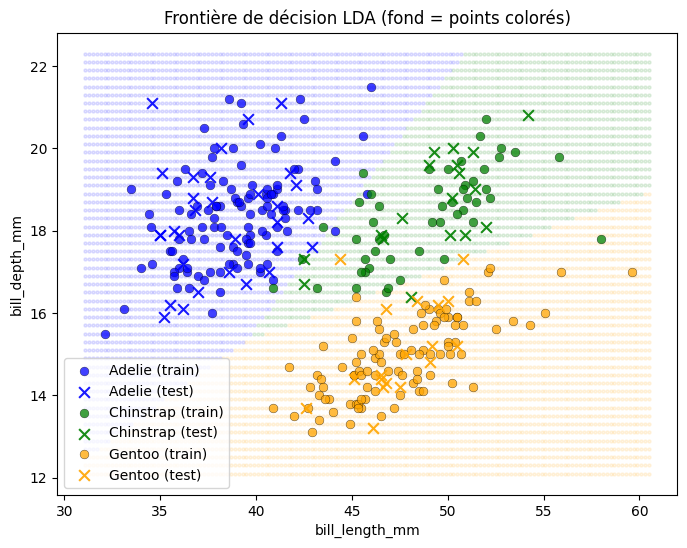

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# ---- 2) Prédictions sur la grille
Z_labels = lda.predict(grid)  # labels texte (ex: "Adelie", ...)
le = LabelEncoder()
y_train_enc = le.fit_transform(y2_train)
y_test_enc  = le.transform(y2_test)

class_names = le.classes_
n_classes = len(class_names)

# Conversion labels -> indices 0..K-1 (cohérents avec LabelEncoder)
Z_numeric = le.transform(Z_labels)

# ---- 3) Couleurs (une par classe)
colors = ['blue', 'green', 'orange', 'red', 'purple'][:n_classes]

# ---- 4) Plot : fond en petits points colorés + données réelles par-dessus
plt.figure(figsize=(8, 6))

# Fond : mini-points de la grille colorés par classe prédite
for i, color in enumerate(colors):
    idx = (Z_numeric == i)
    plt.scatter(
        grid[idx, 0], grid[idx, 1],
        color=color, s=5, alpha=0.1
    )

# Points train/test
for i, color in enumerate(colors):
    idx_train = (y_train_enc == i)
    plt.scatter(
        X2_train[idx_train, 0], X2_train[idx_train, 1],
        color=color, marker='o', s=40, alpha=0.75,
        edgecolors='k', linewidths=0.3,
        label=f"{class_names[i]} (train)"
    )

    idx_test = (y_test_enc == i)
    plt.scatter(
        X2_test[idx_test, 0], X2_test[idx_test, 1],
        color=color, marker='x', s=60, alpha=0.9,
        label=f"{class_names[i]} (test)"
    )

plt.xlabel(feature_2d[0])
plt.ylabel(feature_2d[1])
plt.title("Frontière de décision LDA (fond = points colorés)")
plt.legend()
plt.show()



## 6. Pour aller plus loin (optionnel)

Idées :
- Tester d'autres paires de variables 2D et comparer les accuracies.
- Modifier `max_depth` de l'arbre et observer l'impact (sur-apprentissage).
- Ajouter une étape de normalisation (StandardScaler) avant LDA et comparer.
